In [30]:
import numpy as np
import matplotlib.pyplot as plt

## Diccionarios

Los diccionarios son una estructura de datos disponible en Python, los cuales comparten algunas caracteristicas con las listas: 
   - Son mutables
   - Son dinamicos (se pueden aumentar o reducir)
   - Se pueden anidar (un dict puede contener otro dict)
   
La diferencia reside en que, como en las listas accedemos a los elementos a partir de su indice dentro de la lista, en un diccionario accedemos a un elemento a partir de una clave o **key**. Los elementos en un diccionario NO estan ordenados. 

In [31]:
# definicion / sintaxis
numeros = {'uno' : 1, 'dos' : 2, 'tres' : 3}
print(numeros)

dias = {1 : 'Lunes', 2 : 'Martes', 3 : 'Miercoles'}
print(dias)

{'uno': 1, 'dos': 2, 'tres': 3}
{1: 'Lunes', 2: 'Martes', 3: 'Miercoles'}


In [32]:
# definicion usando funcion integrada dict
dias_2 = dict([(1,'Lunes'), (2, 'Martes'), (3, 'Miercoles')])
dias_2 == dias

True

In [33]:
# acceder a los valores de un diccionario --> usando las keys
dias[1]

'Lunes'

In [34]:
numeros['uno']

1

In [35]:
# editar un diccionario
dias[3] = 'Osvaldo'
print(dias)

{1: 'Lunes', 2: 'Martes', 3: 'Osvaldo'}


In [36]:
# agregar valores a un diccionario
dias[4] = 'Juernes'
print(dias)

{1: 'Lunes', 2: 'Martes', 3: 'Osvaldo', 4: 'Juernes'}


Algunas reglas sobre las keys o claves son:
   - Un valor de key puede aparecer una unica vez en un diccionario
   - Las keys pueden ser cualquier tipo de DATO (entero, flotante, booleano)
   - Las tuplas pueden ser keys, pues son inmutables
   - Ni las listas ni otro diccionario pueden ser keys, pues son mutables
   
Algunos operadores y funciones integradas vistas para listas pueden ser usados sobre diccionarios, como por ejemplo:

In [37]:
dias

{1: 'Lunes', 2: 'Martes', 3: 'Osvaldo', 4: 'Juernes'}

In [38]:
# operador in. Busca en las keys
'Lunes' in dias

False

In [39]:
1 in dias

True

In [40]:
# funcion integrada len. Indica cantidad de pares key-values
len(dias)

4

Los diccionarios poseen metodos propios que pueden ser utiles, como por ejemplo: 

In [41]:
# metodo clear --> vaciar el diccionario
print(dias_2)
dias_2.clear()
print(dias_2)

{1: 'Lunes', 2: 'Martes', 3: 'Miercoles'}
{}


In [42]:
# metodo items --> devuelve una lista que contiene los pares key-values
dias.items()

dict_items([(1, 'Lunes'), (2, 'Martes'), (3, 'Osvaldo'), (4, 'Juernes')])

In [44]:
for key, values in dias.items():
    print(f'la key {key} corresponde al valor {values}')

la key 1 corresponde al valor Lunes
la key 2 corresponde al valor Martes
la key 3 corresponde al valor Osvaldo
la key 4 corresponde al valor Juernes


In [47]:
# metodos keys y values por separado
print(dias.keys())

dict_keys([1, 2, 3, 4])


In [48]:
print(dias.values())

dict_values(['Lunes', 'Martes', 'Osvaldo', 'Juernes'])


# Mas sobre funciones...

<img src="imagenes/plot.png" alt="Drawing"/>


Comúnmente, en la documentación de las funciones con las que trabajamos, podemos notar que en la lista de parámetros de entrada aparecen los terminos **args y kwargs**. Que significan? 

Resulta que podemos pasar un numero **variable** de argumentos a una función definida. Estos argumentos variables pueden ser pasados sin utilizar llaves (args), o especificandolos con llaves, es decir, siguiendo el formato key-value como dentro de un diccionario (kwargs)

 - Args: Se utiliza el operador * anterior a la variable que por convencion se define como 'args' para indicar que este conjunto de argumentos es un iterable, sobre el cual se puede operar.
 
 - Kwargs: Se utiliza el operador ** anterior a la variable que por convencion se define como kwargs para poder utilizarla como una lista de llaves-valores de longitud variable

In [49]:
# argumentos sin llaves

def muchas_variabes(*args):
    for argumento in args:
        print(argumento)

In [51]:
muchas_variabes('Empanadas pi', 'compre', 3, 'coma', 14)

Empanadas pi
compre
3
coma
14


In [55]:
def muchas_variables_conllaves(**kwargs):
    for key, value in kwargs.items():
        print(f'la llave {key} corresponde al valor {value}')

In [64]:
muchas_variables_conllaves( largo = 54 , alto = 56, formato = '.mp3')

la llave largo corresponde al valor 54
la llave alto corresponde al valor 56
la llave formato corresponde al valor .mp3


In [65]:
variables = {'largo' : 54, 'alto' : 56, 'formato' : '.mp3'}
muchas_variables_conllaves(**variables)

la llave largo corresponde al valor 54
la llave alto corresponde al valor 56
la llave formato corresponde al valor .mp3


Un ejemplo de aplicacion útil es a la hora de hacer graficos, podemos pasar un conjunto de configuraciones a partir de un diccionario. De esta manera, agrupamos estas variables que tienen que ver con formato, y las podemos replicar facilmente en otros graficos.

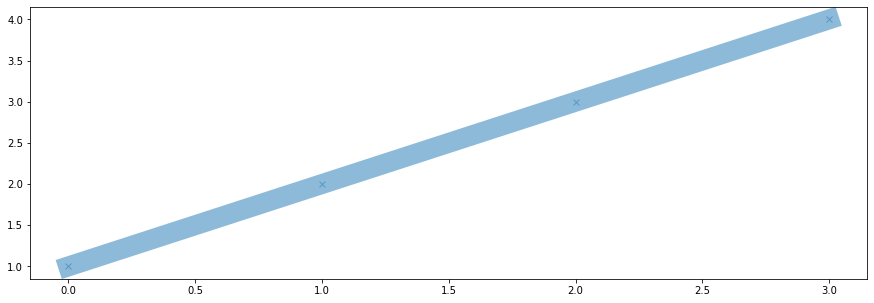

In [74]:
configs = {'linewidth' : 20, 'alpha' : 0.5, 'marker' : 'x'}
plt.figure(figsize=(15,5))
plt.plot([1,2,3,4], **configs)
plt.show()

# Crear y utilizar módulos de funciones

A la hora de trabajar, es una buena práctica ordenar las definiciones de funciones dentro de módulos, los cuales vamos a importar al principio del script op notebook principal en donde vamos a hacer uso de estas herramientas para el procesamiento de los datos. 

Veamos un ejemplo en el que definimos una función que genere tonos senoidales. Vamos a definir la misma dentro de un archivo llamado 'mis_funciones.py'. Luego, vamos a importar este módulo para poder utilizar la función que definimos. 

In [84]:
def generar_tono(largo, freq, fs):
    """
    Genera un tono senoidal 
    
    Parámetros:
    ------------------------------------------------
        largo (float): duracion del tono en segundos
        freq (float) : frecuencia del tono a generar
        fs (int)     : frecuencia de muestreo
    
    Salida:
    ------------------------------------------------
        t (ndarray)    : vector temporal
        seno (ndarray) : tono senoidal 
    """
    t = np.linspace(0, largo, int(largo * fs))
    seno = np.sin(2*np.pi*freq*t)
    return t, seno 

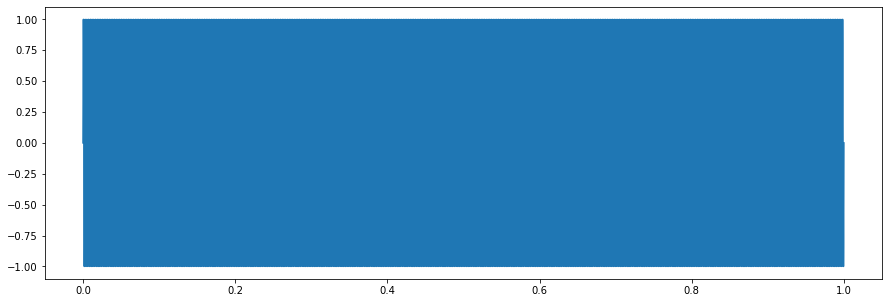

In [127]:
t, tono = generar_tono(1, 440, 44100) 
plt.figure(figsize=(15,5))
plt.plot(t, tono)
plt.show()

# Entrada y salida de datos

Muchas veces vamos a trabajar con variables que vamos a querer guardar para trabajarlas desde otro lugar, para transferirlas o para tener un registro de su estado actual. Con los arrays, esto lo podemos conseguir facilmente utilizando el formato .npy pensado para este propósito

In [93]:
# guardemos el tono que generamos anteriormente
np.save('tono_440Hz.npy', tono)

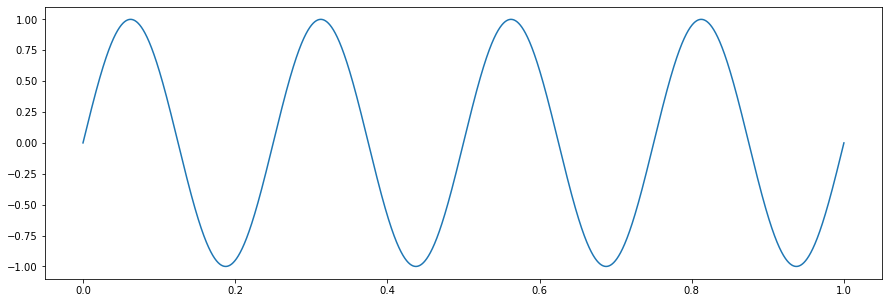

In [94]:
# cargo este dato para utilizarlo
tono440 = np.load('tono_440Hz.npy')
plt.figure(figsize=(15,5))
plt.plot(t, tono)
plt.show()

Como usualmente vamos a trabajar con audio, es bueno saber que también podemos cargar y guardar datos en formatos de audio. Para esto existen numerosas bibliotecas disponibles, siendo las mas utilizadas **SoundFile y LibRosa**. Veamos un ejemplo.

In [121]:
import soundfile as sf
audio, fs = sf.read('audio.wav')

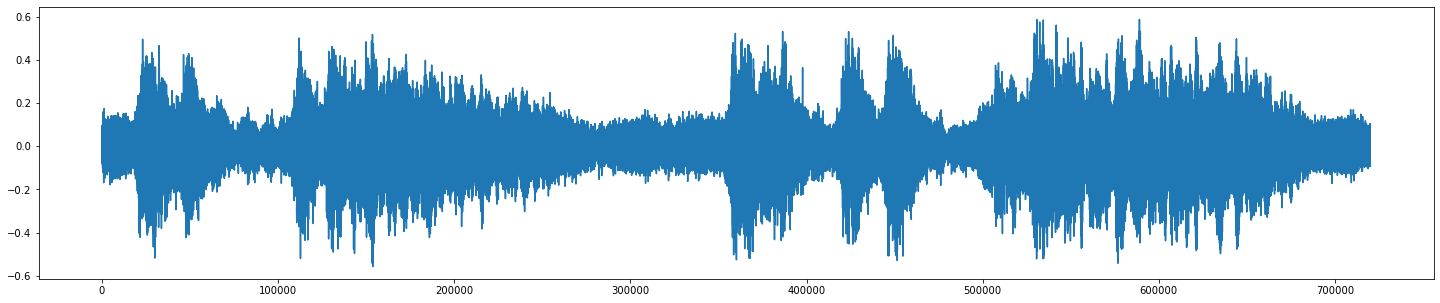

In [122]:
plt.figure(figsize=(25,5))
plt.plot(audio)
plt.show()

Otra herramienta muy util a la hora de trabajar con audio es la interface de Python para reproducir audio. Veamos como funciona. 

In [124]:
from IPython.display import Audio
Audio(data = audio, rate = fs)

In [128]:
Audio(data = tono, rate = 16000)

De igual manera, tenemos funciones para guardar en formato de audio.

In [130]:
sf.write?

In [132]:
sf.write(file = 'tono440.wav', data = tono, samplerate = 16000)

# Comentarios
 - Trabajar con muestras en el eje temporal
 - Trabajar con tiempo en el eje temporal